In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import time

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from data_manager import *
from metadata import *
from cell_utilities import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for AWS compute node
rm -rf /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt && mkdir -p /shared/CSHL_data_processed/MD635
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt


No vtk
Child returned 0
Child returned 1
0.34 seconds.
File does not exist: /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt
Child returned 0


rm -rf /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt && mkdir -p /shared/CSHL_data_processed/MD635
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt


Child returned 1
0.34 seconds.
File does not exist: /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt


In [2]:
alg = 'cellprofiler'
# alg = 'farsight'
# alg = 'myown'

rm -rf /shared/CSHL_cells_v2/detected_cells/MD589/MD589-N17-2015.07.30-17.07.32_MD589_1_0049/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_blobCentroids.bp && mkdir -p /shared/CSHL_cells_v2/detected_cells/MD589/MD589-N17-2015.07.30-17.07.32_MD589_1_0049
aws s3 cp s3://mousebrainatlas-data/CSHL_cells_v2/detected_cells/MD589/MD589-N17-2015.07.30-17.07.32_MD589_1_0049/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_blobCentroids.bp /shared/CSHL_cells_v2/detected_cells/MD589/MD589-N17-2015.07.30-17.07.32_MD589_1_0049/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_blobCentroids.bp


Child returned 0
Child returned 0
0.46 seconds.


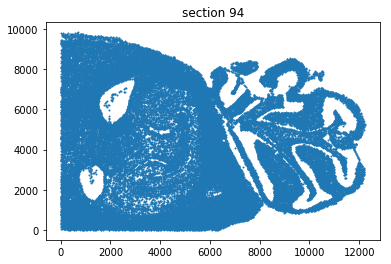

In [3]:
stack = 'MD589'
first_bs_section, last_bs_section = metadata_cache['section_limits'][stack]

# for sec in range(first_bs_section, last_bs_section+1):
for sec in [94]:
    blob_centroids = load_cell_data(stack=stack, sec=sec, what='blobCentroids', ext='bp')
    plt.scatter(blob_centroids[:,0], blob_centroids[:,1], s=1);
    plt.title('section %d' % sec);
    plt.show();

In [4]:
# Visualize

for stack in ['MD585']:
    
    output_dir = create_if_not_exists(os.path.join(DETECTED_CELLS_ROOTDIR, stack))
    
    sections_to_filenames = metadata_cache['sections_to_filenames'][stack]
    first_bs_section, last_bs_section = metadata_cache['section_limits'][stack]
    w, h = metadata_cache['image_shape'][stack]
    
    for sec in [200]:
#     for sec in range(first_bs_section, last_bs_section, 50):

        t = time.time()

        fn = sections_to_filenames[sec]
        fn_output_dir = create_if_not_exists(os.path.join(output_dir, fn))

#         blob_contours_fp = os.path.join(fn_output_dir, '%(fn)s_blobContoursGlobal_%(alg)s.hdf' % {'fn': fn, 'alg': alg})
#         download_from_s3(blob_contours_fp)
#         blob_contours = load_hdf_v2(blob_contours_fp)

        blob_contours = load_cell_data(stack=stack, sec=sec, what='blobContoursGlobal_%(alg)s' % {'alg': alg}, ext='hdf')

        n_blobs = len(blob_contours)

        blob_contour_viz = np.zeros((h, w, 4), np.uint8)

        bar = show_progress_bar(first_bs_section, last_bs_section)
        for i in range(n_blobs):
            bar.value = i
            cnt = blob_contours[i]
            blob_contour_viz[np.minimum(h-1, np.maximum(cnt[:,1], 0)), 
                             np.minimum(w-1, np.maximum(cnt[:,0], 0))] = (255,0,0,255)
    #         img[np.minimum(h-1, np.maximum(cnt[:,1], 0)), np.minimum(w-1, np.maximum(cnt[:,0], 0))] = (255,0,0)
    
#         viz_fp = os.path.join(fn_output_dir, '%(fn)s_blobContours_viz_%(alg)s.png' % {'fn':fn, 'alg': alg, 'stack': stack})
        viz_fp = get_cell_data_filepath(stack=stack, sec=sec, what='blobContours_viz_%(alg)s' % {'alg': alg}, ext='png')
        imsave(viz_fp, blob_contour_viz)
        upload_to_s3(viz_fp)
        sys.stderr.write('Save image: %.2f\n' % (time.time() - t) ) # 40s / section

rm -rf /shared/CSHL_cells_v2/detected_cells/MD585/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106_blobContoursGlobal_cellprofiler.hdf && mkdir -p /shared/CSHL_cells_v2/detected_cells/MD585/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106
aws s3 cp s3://mousebrainatlas-data/CSHL_cells_v2/detected_cells/MD585/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106_blobContoursGlobal_cellprofiler.hdf /shared/CSHL_cells_v2/detected_cells/MD585/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106_blobContoursGlobal_cellprofiler.hdf


Child returned 0
Child returned 0
0.99 seconds.
Widget Javascript not detected.  It may not be installed or enabled properly.


aws s3 cp /shared/CSHL_cells_v2/detected_cells/MD585/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106_blobContours_viz_cellprofiler.png s3://mousebrainatlas-data/CSHL_cells_v2/detected_cells/MD585/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106_blobContours_viz_cellprofiler.png


Child returned 0
1.15 seconds.
Save image: 29.33


In [11]:
display_image(blob_contour_viz[1000:2000, 1000:2000])

/shared/MouseBrainAtlas/cells/tmp.jpg